# MK Praktikum Unggulan Universitas Gunadarma
# Nama Mata Kuliah: Praktikum Komputasi Big Data (Tingkat 2)  
---
### Overview Dataset

Dataset yang digunakan pada pertemuan ini adalah "Data Sensus Penghasilan". Data ini diambil dari database biro Sensus 1994 oleh Ronny Kohavi dan Barry Becker (Data Mining and Visualization, Silicon Graphics).

Data set ini berisikan beberapa kategori sebagai berikut:
* age
* sex
* race
* education
* marital-status
* workclass
* occupation
* relationship
* native-country
* hours-per-week
* capital-loss
* capital-gain
* fnlwgt

# Exploratory Data Analysis (EDA)

Pada praktikum ini, Anda akan melihat beberapa contoh Exploratory Data Analysis (EDA) pada data set sensus penghasilan. 

* [Pengambilan Data](#1)
* [Univariate Analysis](#2)
* [Bivariate Analysis](#3)

# Instruksi Tugas Praktikum FIKTI dan FTI

<div class ="alert alert-info">
    <strong>Daftar Program Studi:</strong><br>
    <hr>
    <strong> Fakultas Ilmu Komputer dan Teknologi Informasi</strong><br>
    - Sistem Informasi (S1 - SI)<br>
    - Sistem Komputer (S1 - SK)<br>
    - Program Studi Manajemen Informatika (D3 - MI)<br>
    - Program Studi Teknik Komputer (D3 - TK)<br><br>
    <strong> Fakultas Teknologi Industri</strong><br>
    - Informatika (S1)<br>
    - Teknik Mesin (S1)<br>
    - Teknik Industri (S1)<br>
    - Teknik Elektro (S1)<br>
    - Agroteknologi (S1)<br>
</div>


1. Buat dan jelaskan univariate analysis untuk kategori <code>hours-per-week</code> dan <code>income</code>
2. Buat dan jelaskan Bivariate analysis untuk hubungan antara <code>hours-per-week</code> dan <code>income</code>

<b> Notes: </b> Lakukan instruksi tugas diakhir file hands-on.

<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [15]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [16]:
data.shape

(48842, 15)

In [17]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

# 2. Exploratory Data Analysis (EDA)

## 2.1.Univariate analysis
<a id="2"></a>

- Jenis analisis statistik yang melibatkan satu variabel pada suatu waktu.
- Tujuannya adalah untuk memberikan gambaran tentang distribusi, statistik deskriptif, dan sifat-sifat lainnya dari variabel tunggal.
- Contoh analisis univariat termasuk histogram, box plot, ringkasan statistik seperti mean, median, dan modus, serta penghitungan frekuensi.

## 2.1.1 Kolom "Age"

### **i.	Distribusi**

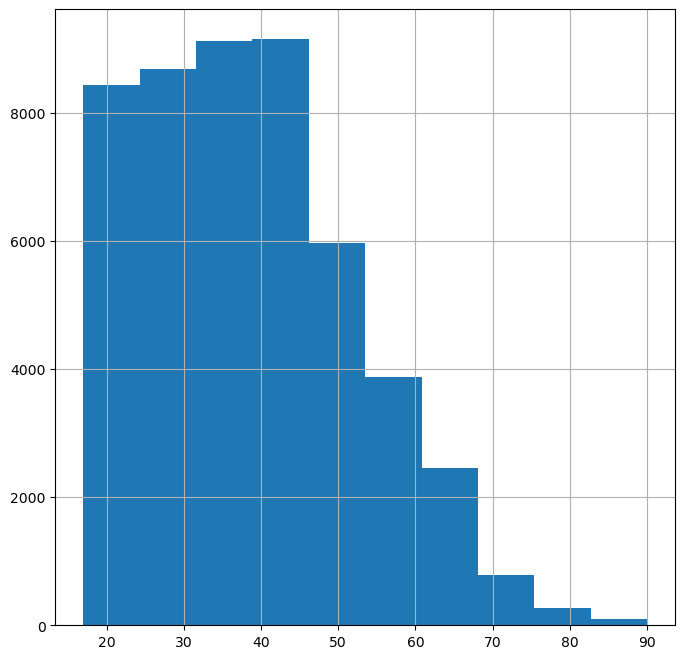

In [22]:
# Visualisasi HISTOGRAM
# Distribusi data dari kolom "Age"
data['age'].hist(figsize=(8,8))
plt.show()

In [23]:
data[data["age"]>70].shape

(868, 15)

### **ii.	Deskripsi**
Histogram di atas menjelaskan bahwa:
*  Atribut "usia" tidak simetris.
*  Miring ke kanan (Tapi ini baik karena orang dewasa yang lebih muda mendapatkan upah bukan yang lebih tua).
*  Usia minimum dan maksimum orang adalah 17 dan 90 tahun.
*  Dataset ini memiliki lebih sedikit pengamatan (868) tentang usia orang setelah usia tertentu, yaitu 70 tahun.

## 2.1.2 Kolom "Income"

### **i. Distribusi**

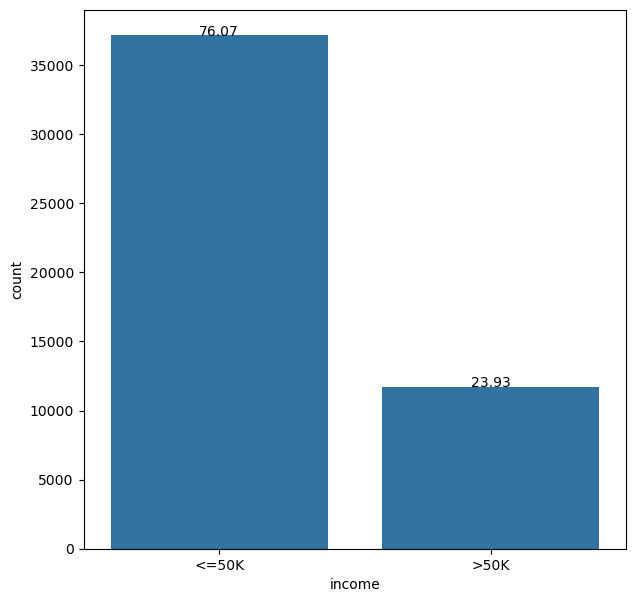

In [27]:
# Visualisasi BOXPLOT
# Distribusi data dari kolom "Income"
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Deskripsi**
Distribusi di atas menjelaskan bahwa **Dataset ini tidak seimbang, yaitu 23,93% di antaranya termasuk dalam kelompok pendapatan 1 (yang berpenghasilan lebih dari \\$50K) dan 76% termasuk dalam kelompok pendapatan 0 (yang berpenghasilan kurang dari \\$50K).**

<a id="3"></a>
# 2.2.Bivariate analysis

- Analisis bivariate melibatkan dua variabel pada saat yang sama dan mencoba untuk memahami hubungan antara keduanya.
- Analisis bivariate sering digunakan untuk menemukan korelasi atau asosiasi antara dua variabel, serta untuk memahami bagaimana variabel satu mempengaruhi variabel lainnya.
- Contoh analisis bivariate meliputi scatter plot, korelasi pearson, korelasi spearman, dan uji-t dua sampel.

## 2.2.1 Kolom "Age" & "income" (Hubungan)

### i. **Boxplot**

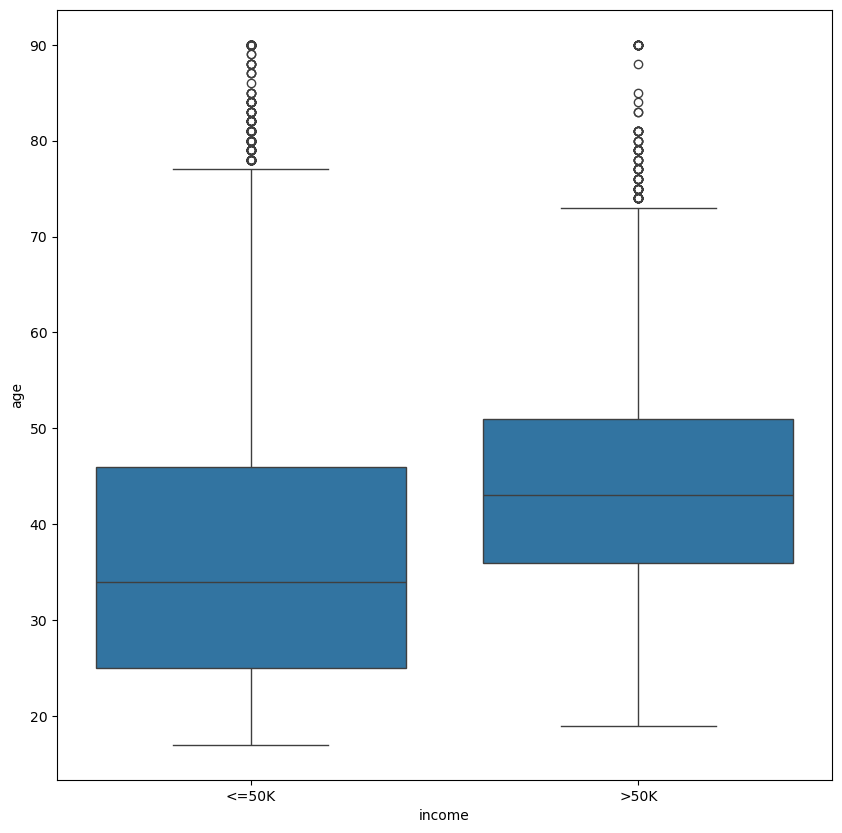

In [32]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [33]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


### ii. Deskripsi
Bivariate boxplot di atas menjelaskan bahwa:
* Rata-rata "usia" untuk kelompok penghasilan (<= \\$50K) adalah 36,8 tahun. Dan untuk kelompok penghasilan (> \\$50K) adalah 44,2 tahun.
* Kelompok pendapatan (<=50K) memiliki median "usia" (34 tahun) lebih rendah daripada kelompok pendapatan (>50K) yang memiliki median "usia" (42 tahun).

### iii. Uji Hipotesis (untuk menguji hubungan antara kolom Age & Income )
**Two sampled T-test**:
Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.

Contoh: Apakah ada hubungan antara usia dan pendapatan?

Tentukan null dan alternate hypothesis:

* Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
* Alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis: Tidak ada perbedaan rata-rata usia kelompok pendapatan > 50k dan kelompok pendapatan <= 50k.
*  Alternate Hypothesis: Ada perbedaan rata-rata usia kelompok pendapatan > 50k dan kelompok pendapatan <= 50k.

In [39]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_1 = data[data['income']=='<=50K']['age']
income_0 = data[data['income']=='>50K']['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)


In [40]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval < 0.05:
    print("Kesimpulan: Null hypothesis ditolak")
else:
    print("Kesimpulan: Null hypothesis diterima")

ttest -2.9419040721981236
p value 0.003680081981456227
Kesimpulan: Null hypothesis ditolak


### iv. Kesimpulan akhir

Menggunakan analisis statistik, dapat disimpulkan bahwa:
* Terdapat perbedaan yang signifikan pada rata-rata usia kelompok berpenghasilan > 50K dan kelompok berpenghasilan <= 50K. Hal Ini membuktikan bahwa usia memiliki peranan dalam membedakan kelompok pendapatan.

# Tugas
1. Buat dan jelaskan univariate analysis untuk kategori <code>hours-per-week</code> dan <code>income</code>
2. Buat dan jelaskan Bivariate analysis untuk hubungan antara <code>hours-per-week</code> dan <code>income</code>

<div class="alert alert-info">
    <strong>Catatan!</strong><br>
    - Pada bagian "...#CODE HERE <...>" digantikan dengan code python sesuai dengan perintah. <br>
    - Pada bagian "...# Ketik disini..." silakan diketikkan jawaban atas pertanyaan yang diberikan menggunakan Bahasa Indonesia.
    </div>

<div class ="alert alert-warning">
Silahkan tambahkan cell code apabila diperlukan.  

</div>

## 1. Univariate analysis

## 1.1 Kolom "hours-per-week"

### **i.	Distribusi**

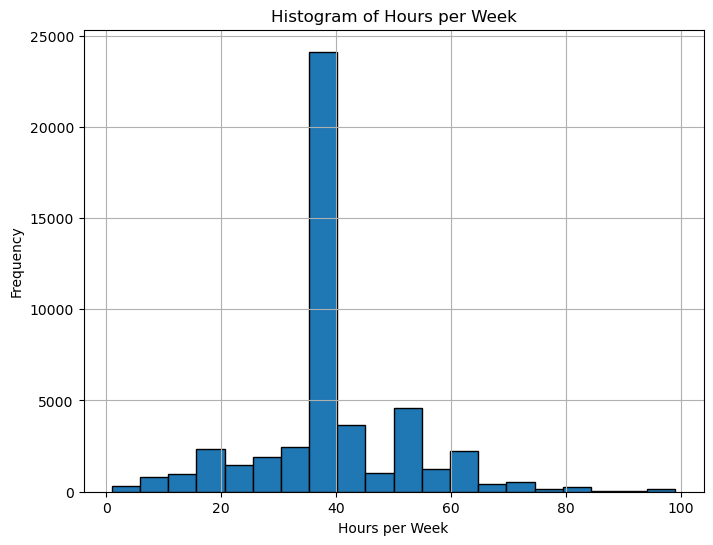

In [70]:
# Buat histogram dari kolom "hours-per-week"
# CODE HERE ...
plt.figure(figsize=(8, 6))
data['hours-per-week'].hist(bins=20, edgecolor='black')  # Mengatur jumlah bin dan warna tepi
plt.title('Histogram of Hours per Week')  # Judul
plt.xlabel('Hours per Week')  # Label sumbu x
plt.ylabel('Frequency')  # Label sumbu y
plt.grid(True)  # Menonaktifkan grid
plt.show()

### **ii. Deskripsi**


# Jelaskan hasil diagram tersebut
Frekuensi Tertinggi:
*  Dari histogram, dapat dilihat bahwa frekuensi paling tinggi terjadi pada rentang 35-40 jam per minggu.
*  Ini menunjukkan bahwa mayoritas individu dalam dataset menghabiskan waktu kerja di sekitar jumlah jam tersebut, yang mencerminkan pola kerja standar.

Frekuensi Terendah:
*  Frekuensi terendah terlihat pada rentang 70-100 jam per minggu.
*  Hal ini menunjukkan bahwa sangat sedikit orang yang bekerja dalam rentang jam yang sangat tinggi ini, mungkin disebabkan oleh kelelahan atau kebijakan kerja yang membatasi jam kerja.

Frekuensi Antara Rentang:
*  Selain itu, terdapat lebih banyak frekuensi pada rentang 40-65 jam per minggu dibandingkan dengan rentang 0-35 jam per minggu.
*  Ini menunjukkan bahwa setelah jam kerja standar, banyak individu yang juga bekerja lebih dari 40 jam, tetapi tidak mencapai jam kerja yang sangat tinggi.


## 1.2 Kolom "Income"

### **i.	Distribusi**

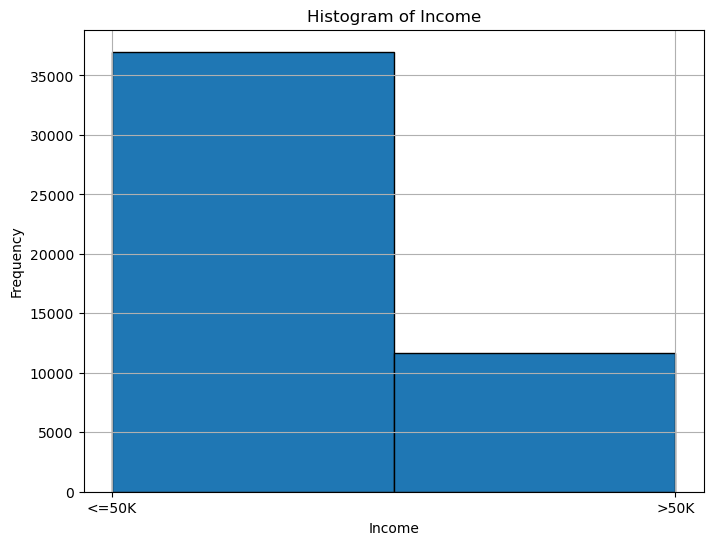

In [74]:
# Buat histogram dari kolom "Income"
# CODE HERE ...
plt.figure(figsize=(8, 6))
data['income'].hist(bins=2, edgecolor='black')  # Mengatur jumlah bin dan warna tepi
plt.title('Histogram of Income')  # Judul
plt.xlabel('Income')  # Label sumbu x
plt.ylabel('Frequency')  # Label sumbu y
plt.grid(True) 
plt.show()

### **ii. Deskripsi**

# Jelaskan hasil diagram tersebut
# Ketik disini ...
Frekuensi Penghasilan ≤ 50k:
*  Dari histogram, terlihat bahwa jumlah orang yang memiliki penghasilan ≤ 50k jauh lebih banyak.
*  Frekuensi untuk kelompok ini mencapai lebih dari 35,000 individu, menunjukkan bahwa mayoritas populasi dalam dataset memiliki penghasilan di bawah atau sama dengan 50k.

Frekuensi Penghasilan > 50k:
*  Sebaliknya, jumlah orang yang memiliki penghasilan > 50k jauh lebih sedikit.
*  Frekuensi untuk kelompok ini berkisar antara 10,000 hingga 12,000 individu, menunjukkan bahwa hanya sebagian kecil populasi yang memperoleh penghasilan di atas 50k.

Perbandingan yang Jelas:
*  Terdapat perbedaan yang signifikan antara kedua kelompok tersebut, dengan proporsi orang yang berpenghasilan rendah (≤ 50k) jauh lebih tinggi dibandingkan dengan yang berpenghasilan tinggi (> 50k).
*  Hal ini mencerminkan ketimpangan dalam distribusi penghasilan di dalam populasi yang dianalisis.

Implikasi:
*  Hasil ini dapat memberikan wawasan tentang kondisi ekonomi dan kesejahteraan masyarakat.
*  Penting untuk mempertimbangkan faktor-faktor yang mempengaruhi distribusi penghasilan ini, seperti pendidikan, jenis pekerjaan, dan lokasi geografis.

# 2. Bivariate analysis

## 2.1 Kolom "hours-per-week" & "income" (Hubungan)

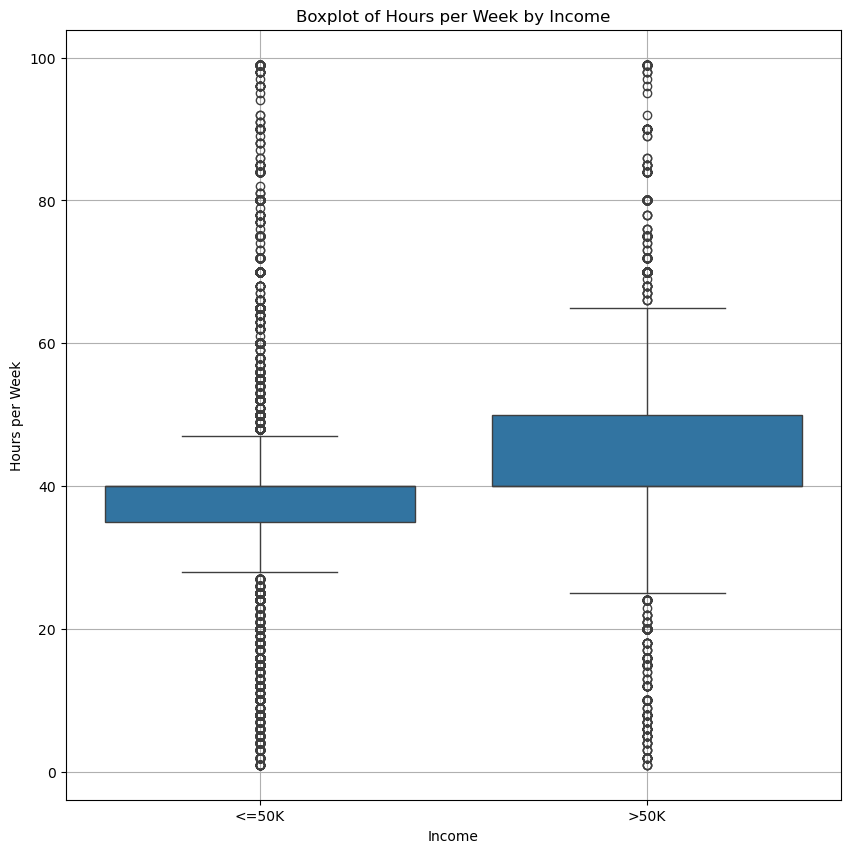

In [91]:
# Buat BOXPLOT, hubungan "hours-per-week" dengan "income"
# CODE HERE ...
# Membuat boxplot untuk hubungan "hours-per-week" dengan "income"
plt.figure(figsize=(10, 10))
sns.boxplot(x='income', y='hours-per-week', data=data)

# Menambahkan judul dan label
plt.title('Boxplot of Hours per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.grid(True)

# Menampilkan plot
plt.show()

### ii. Deskripsi

   

# jelaskan hasil diagram tersebut
# Ketik disini ...
Jam Kerja untuk Penghasilan > 50k:
*  Dari boxplot, terlihat bahwa individu yang memiliki penghasilan > 50k cenderung bekerja lebih banyak, dengan jam kerja per minggu berkisar antara 40 hingga 60 jam.
*  Hal ini menunjukkan bahwa orang-orang dalam kelompok ini mungkin memiliki pekerjaan yang lebih menuntut atau posisi yang memerlukan komitmen waktu yang lebih tinggi.

Jam Kerja untuk Penghasilan ≤ 50k:
*  Sebaliknya, individu yang memiliki penghasilan ≤ 50k menunjukkan jam kerja yang lebih rendah, dengan rata-rata berkisar antara 35 hingga 40 jam per minggu.
*  Ini mungkin mencerminkan jenis pekerjaan yang lebih fleksibel atau pekerjaan dengan jam kerja yang lebih sedikit, seperti pekerjaan paruh waktu atau pekerjaan dengan upah lebih rendah.

Perbandingan yang Jelas:
*  Terdapat perbedaan yang jelas dalam jam kerja antara kedua kelompok penghasilan tersebut.
*  Individu dengan penghasilan lebih tinggi tidak hanya bekerja lebih banyak jam, tetapi juga menunjukkan potensi untuk mendapatkan lebih banyak pendapatan, yang dapat menjadi indikator dari jenis pekerjaan atau industri tertentu.

Implikasi:
*  Temuan ini dapat memberikan wawasan tentang hubungan antara waktu kerja dan penghasilan, serta bagaimana jam kerja dapat berkontribusi pada peningkatan pendapatan.
*  Ini juga dapat membuka diskusi tentang keseimbangan kerja-hidup dan bagaimana pekerjaan dengan jam kerja lebih tinggi dapat mempengaruhi kesejahteraan individu.

### iii. Uji Hipotesis (untuk menguji hubungan antara hours-per-week & income)
Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis: Tidak ada perbedaan rata-rata kelompok pendapatan > 50k dan kelompok pendapatan <= 50k.
*  Alternate Hypothesis: Ada perbedaan rata-rata kelompok pendapatan > 50k dan kelompok pendapatan <= 50k.

In [97]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
# CODE HERE ...
# Pisahkan data berdasarkan kelompok pendapatan
group_greater_50k = data[data['income'] == '>50K']['hours-per-week']
group_less_equal_50k = data[data['income'] == '<=50K']['hours-per-week']

# Lakukan uji t untuk dua sampel independen
t_statistic, p_value = stats.ttest_ind(group_greater_50k, group_less_equal_50k)

# Tentukan tingkat signifikansi
alpha = 0.05

# Interpretasi hasil
print(f'T-statistic: {t_statistic}, P-value: {p_value}')

if p_value < alpha:
    print("Tolak hipotesis nol: Ada perbedaan rata-rata jam kerja antara kedua kelompok.")
else:
    print("Gagal menolak hipotesis nol: Tidak ada perbedaan rata-rata jam kerja antara kedua kelompok.")

T-statistic: 51.498497025288046, P-value: 0.0
Tolak hipotesis nol: Ada perbedaan rata-rata jam kerja antara kedua kelompok.


### iv. Kesimpulan akhir


<div class="alert alert-warning">
<strong>Perhatian!</strong> Berikut merupakan cara konversi File IPYNB menjadi File PDF untuk melakukan pengumpulan tugas di Virtual Class. 
    <a href="https://youtu.be/qXELXtnAK7c">Video konversi</a>.
    </div>



---


Copyright © 2024 by Pengelola MK Praktikum Unggulan (Praktikum DGX), Universitas Gunadarma 


https://www.praktikum-hpc.gunadarma.ac.id/